In [1]:
import pysam
import numpy as np
import cPickle as pickle
from collections import Counter
import matplotlib.pyplot as plt
from operator import itemgetter
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import logging
logging.basicConfig(level=logging.INFO)

In [4]:
#samples = ['ATATAG','AAAGTT', 'ATATAG', 'ATCAAA', 'CCCTGG', 'CCGGAC', 'GACCGC', 'GGCGTC', 'GTTCGA', 'TAAAGT', 'TCTGCA', 'TTAATC']
sample = 'ATATAG'
in_file = '/data/UMI/data/MUS/sample_' + sample + '.bam'
st = pysam.AlignmentFile(in_file,"rb")

In [5]:
st.reset()
reads = st.fetch(until_eof=True)

x = []

for r in reads:
    xm = r.get_tag('XM')
    s = r.query_sequence
    x.append(xm + ':' + s)

In [6]:
y = np.unique(x)

In [7]:
umis = [str.split(item,':')[0] for item in y]

In [8]:
print 'Total number of reads: %s' % len(umis)

Total number of reads: 5095955


In [9]:
l = sorted(Counter(umis).values(), reverse=True)
print 'Number of distinct UMIs used for tagging molecules: %s' %len(l)

Number of distinct UMIs used for tagging molecules: 716767


In [10]:
a = float(5095955)/716767
print 'Expected average reads per molecule: %0.2f' % a

Expected average reads per molecule: 7.11


In [11]:
dist = sorted(Counter(l).items())
data1 = [i for i,j in dist]
data2 = [j for i,j in dist]

In [118]:
l1 = [i for i in l if i < 5 ]
l2 = [i for i in l if 5 <= i <= 60]
l3 = [i for i in l if i > 60]

In [12]:
#l2

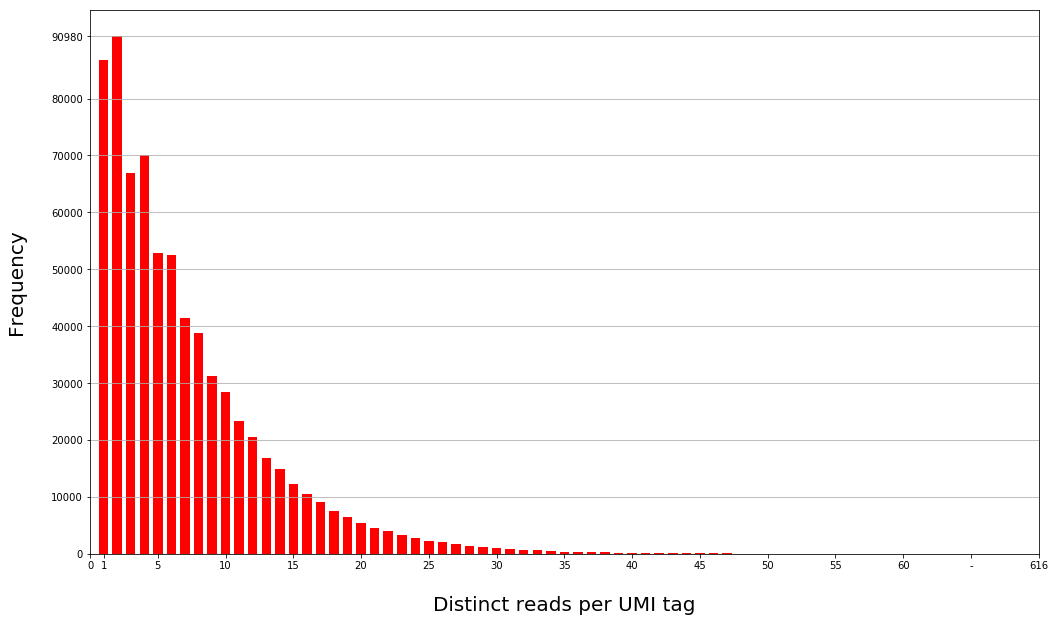

In [16]:
plt.close('all')
fig = plt.figure(figsize=(17,10))
#fig.suptitle('SC RNA-Seq read/UMI distribution', fontsize=17)
#plt.ylim(0, 30000)
plt.xlim(0, 50)
#plt.tight_layout(pad=5, w_pad=0.9, h_pad=10)
#x, labels, rotation='vertical'
labels = ['0', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '60', '-', '616', '1']
plt.xticks(range(0,75,5)+[1], labels)
plt.yticks(range(0,90000,10000)+[90980])
ax = plt.subplot(1, 1, 1)
ax.yaxis.grid()
ax.set_xlabel('Distinct reads per UMI tag', fontsize=20, labelpad=25)
ax.set_ylabel('Frequency', fontsize=20, labelpad=25)
ax.bar(data1, data2, width=0.7, color='r', align='center')
#plt.show();
plt.savefig('umi_dist_sample')

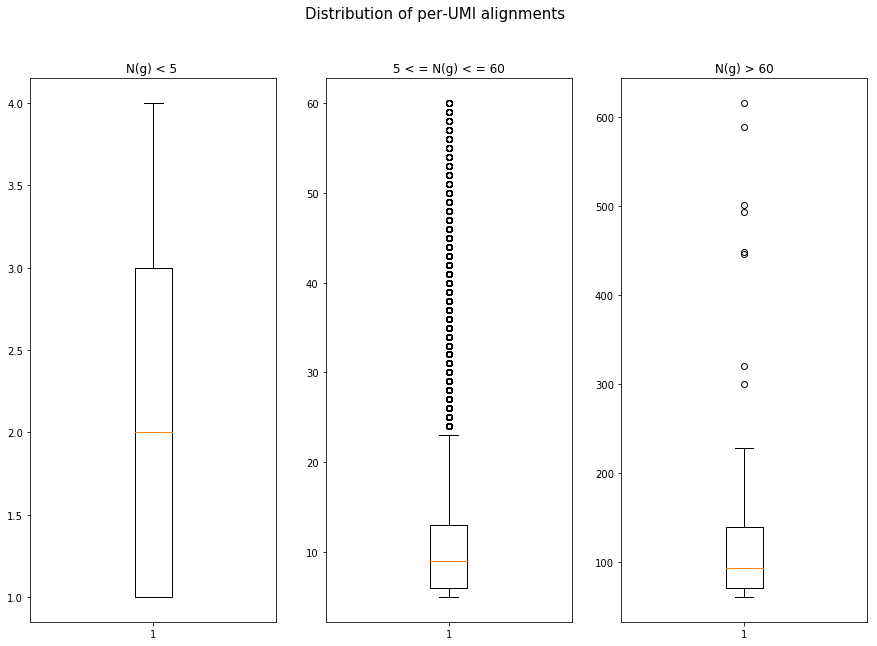

In [120]:
fig = plt.figure(figsize=(15,10))

plt.subplot(1, 3, 1)
plt.boxplot(l1)
plt.title('N(g) < 5 ')

plt.subplot(1, 3, 2)
plt.boxplot(l2)
plt.title('5 < = N(g) < = 60')
#plt.ylim(0,100)

plt.subplot(1, 3, 3)
plt.boxplot(l3)
plt.title('N(g) > 60')
plt.suptitle('Distribution of per-UMI alignments', fontsize=15)
plt.savefig('umi')

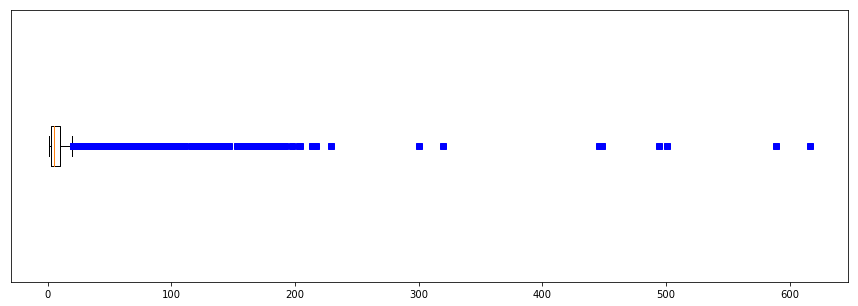

In [141]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1, 1, 1)
plt.boxplot(l, 0, 'bs', 0)
#plt.title('Blub')
plt.yticks([0], label=[''])
plt.savefig('umi-boxplot')

In [84]:
#labels = ['0','1', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '60', '...', '616']
data3 = data1[57:]
data4 = data2[57:]

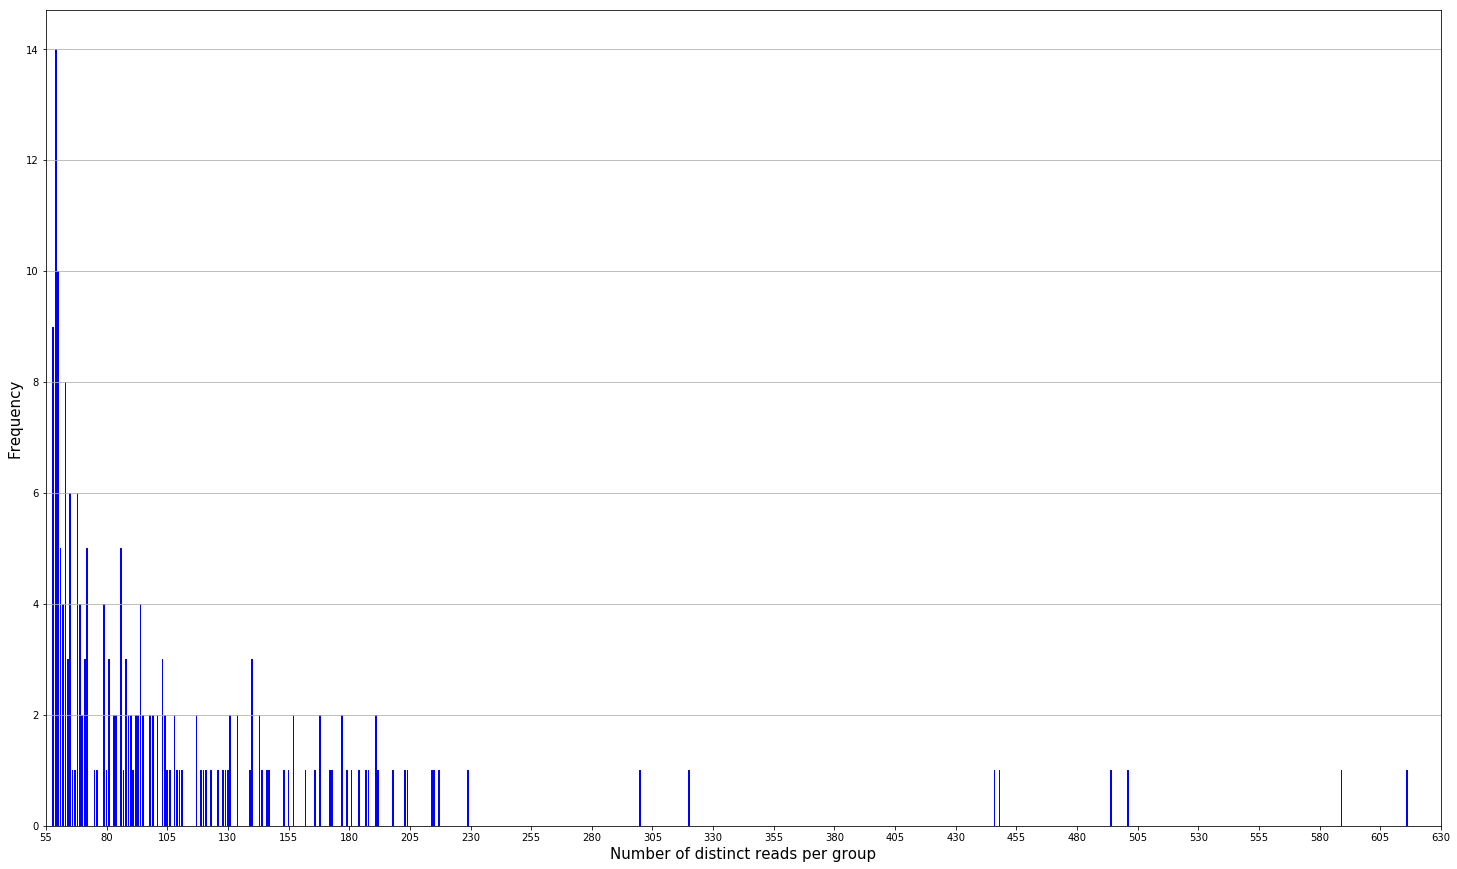

In [100]:
plt.close('all')
fig = plt.figure(figsize=(25,15))
#fig.suptitle('Distribution of barcoded read groups for a single cell', fontsize=15, fontweight='bold')
#plt.ylim(0, 30000)
plt.xlim(55, 615)
#plt.tight_layout(pad=5, w_pad=0.9, h_pad=10)
#x, labels, rotation='vertical'
plt.xticks(range(55,655,25))
#plt.yticks(range(0,90000,10000)+[90980])
ax = plt.subplot(1, 1, 1)
ax.yaxis.grid()
ax.set_xlabel('Number of distinct reads per group', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.bar(data3, data4, width=0.7, color='b', align='center')
#plt.show();
plt.savefig('umi_dist_sample')

In [7]:
df = pd.DataFrame(a, columns=['QN','XS'])

In [60]:
range(1,75,5)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71]

In [8]:
dfg = df.groupby('XS')['QN']

In [24]:
reps = []
for name, group in dfg:
    # print the xm + seq code
    # print(name)
    # print the reads names in same code group
    # print(group)
    if len(group) > 1:
        for g in group[1:]:
            reps.append(g)

In [25]:
Counter(reps)

Counter({'HISEQ:280:C9J9KANXX:1:1309:15995:73564': 1,
         'HISEQ:280:C9J9KANXX:2:2305:8082:43925': 1,
         'HISEQ:280:C9J9KANXX:1:1108:19463:65951': 1,
         'HISEQ:280:C9J9KANXX:1:2306:12688:40431': 1,
         'HISEQ:280:C9J9KANXX:2:1109:12915:19032': 1,
         'HISEQ:280:C9J9KANXX:2:1309:11866:71968': 1,
         'HISEQ:280:C9J9KANXX:1:1309:6229:51770': 1,
         'HISEQ:280:C9J9KANXX:1:1203:13615:97307': 8,
         'HISEQ:280:C9J9KANXX:2:1115:6733:61662': 3,
         'HISEQ:280:C9J9KANXX:2:1201:11238:60521': 3,
         'HISEQ:280:C9J9KANXX:2:1210:1456:16256': 1,
         'HISEQ:280:C9J9KANXX:1:1104:17314:4830': 1,
         'HISEQ:280:C9J9KANXX:2:2102:15097:9209': 3,
         'HISEQ:280:C9J9KANXX:1:1110:11153:58488': 1,
         'HISEQ:280:C9J9KANXX:2:2101:18985:37012': 5,
         'HISEQ:280:C9J9KANXX:1:2209:19175:39076': 1,
         'HISEQ:280:C9J9KANXX:2:1306:4952:12937': 20,
         'HISEQ:280:C9J9KANXX:1:2102:19969:3099': 4,
         'HISEQ:280:C9J9KANXX:2:120

In [14]:
th = [i for i in rp]

In [16]:
st.reset()
reads = st.fetch(until_eof=True)
for r in reads:
    if r.query_name in 

2574750

In [ ]:
out_file = 'sample_' + sample + 'filtered.bam'

o = pysam.AlignmentFile(out_file, 'wb', template=st)

%%time
st.reset()
reads = st.fetch(until_eof=True)
for r in reads:
    if r.is_unmapped